In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
country_db = pd.read_csv('csvdir/Country-Code-Mapping.csv')
main_db = pd.read_csv('csvdir/HackerRank-Developer-Survey-2018-Numeric.csv', low_memory=False)
question_db = pd.read_csv('csvdir/HackerRank-Developer-Survey-2018-Numeric-Mapping.csv')
codebook_db = pd.read_csv('csvdir/HackerRank-Developer-Survey-2018-Codebook.csv')

In [3]:
#merge two tables by 'CountryNumeric2'
res = pd.merge(main_db,country_db,how='left',left_on=['CountryNumeric2'], right_on=['Value'])

#rename column
res = res.rename(columns={'Label':'CountryName'})

#convert NaN to -1
res['CountryName'] = res['CountryName'].fillna(-1)

#group by 'CountryName'
countries = res[['RespondentID','CountryName']].groupby('CountryName').count()
countries = countries.rename(columns={'RespondentID':'Count'})

#get count
russian_count = countries.filter(like='ussia',axis=0)
print(russian_count)
russian_count = russian_count.iat[0,0]

                    Count
CountryName              
Russian Federation    378


In [4]:
#slice by 'CountryName'
russian_developers = res[res['CountryName']=='Russian Federation']

#group by question about students
russian_students = russian_developers[['RespondentID','q8Student']].groupby('q8Student').count()

#slice by isStudent==True
russian_students = russian_students.filter(items=[1],axis=0)
russian_students = russian_students.iat[0,0]

#get percent
russian_students_percent = russian_students/russian_count
print("%.2f" % (russian_students_percent*100))

12.96


In [5]:
#convert 'q9CurrentRole' from string to numeric
res = main_db
res[['q9CurrentRole']] = pd.to_numeric(res['q9CurrentRole'], errors='coerce')

#slice question_db by question=='q9CurrentRole'
res1 = question_db[question_db['Data Field'] == 'q9CurrentRole']

#merge it
res = pd.merge(res,res1,how='left',left_on=['q9CurrentRole'], right_on=['Value'])

#rename column
res = res.rename(columns={'Label':'RoleName'})

#group by 'RoleName'
res = res[['RespondentID','RoleName']].groupby('RoleName').count()
res = res.rename(columns={'RespondentID':'Count'})

#get counts
web_count = res.filter(like='Web', axis=0).iat[0,0]
data_count = res.filter(like='Data Scientist', axis=0).iat[0,0]
mobile_count = res.filter(like='Mobile', axis=0).iat[0,0]
all_count = main_db.shape[0]

#get percents
web_p=web_count/all_count
data_p=data_count/all_count
mobile_p=mobile_count/all_count

print("%.2f %.2f %.2f" % (data_p*100, web_p*100, mobile_p*100))

1.93 4.11 3.24


In [6]:
codebook_db[codebook_db['Data Field'].isin(['q7Level1','q15Level2','q31Level3','q36Level4'])]

,Data Field,Survey Question,Notes
17,q7Level1,Success! You completed Level 1 of 4. To unloc...,right answer: 1 or C
50,q15Level2,You completed Level 2 of 4! To unlock the next...,"right answer: 1 or 'prints ""Hello World!"" n t..."
243,q31Level3,Woo hoo... you completed Level 3 of 4! To unlo...,right answer: 1 or num%2 == 0
250,q36Level4,Which of the following is useful in traversing...,right answer: 2 or Queue


In [7]:
#slice by right answers
res = russian_developers[(russian_developers['q7Level1'] == 1) &
                         (russian_developers['q15Level2'] == 1) &
                         (russian_developers['q31Level3'] == 1) &
                         (russian_developers['q36Level4'] == '2')]

#get count
absolute_right_count = res.shape[0]

#get percent
absolute_right_p = absolute_right_count/russian_developers.shape[0]

print("%.2f" % (absolute_right_p*100))

77.51


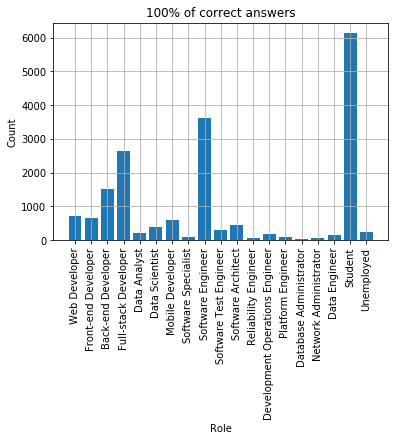

In [8]:
#select the factor
label = question_db[question_db['Data Field']=='q9CurrentRole']
x_name='q9CurrentRole'
x_NULL = ['#NULL!','0']
X = question_db['Value'][question_db['Data Field']==x_name]
X = X[~X.isin(pd.to_numeric(x_NULL, errors='coerce', downcast='integer'))]

#slice main_db by Role and Answers
tmp = main_db[~main_db[x_name].isin(x_NULL)]
tmp = tmp[(tmp['q7Level1'] == 1) & 
          (tmp['q15Level2'] == 1) & 
          (tmp['q31Level3'] == 1) & 
          (tmp['q36Level4'] == '2')]

#split table by factor
X_list = [tmp[tmp[x_name] == el] for el in X]

#get count
X_list = [el.shape[0] for el in X_list]

#plot
plt.bar(np.arange(len(X_list)),X_list)
plt.xticks(np.arange(len(X_list)), label['Label'][label['Value'].isin(X)], rotation=90);
plt.grid()
plt.title('100% of correct answers')
plt.ylabel('Count')
plt.xlabel('Role')
plt.show()